In [1]:
import pandas as pd         # for dataframes and CSV handling
import numpy as np          # for numerical operations

import matplotlib.pyplot as plt    # for plotting
import seaborn as sns             # for advanced data visualizations
import plotly.express as px       # for interactive visualizations


from sklearn.model_selection import train_test_split     # to split your dataset
from sklearn.preprocessing import StandardScaler         # to normalize your features
from sklearn.metrics import classification_report, accuracy_score  # for evaluating performance


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



2025-07-21 19:29:33.343018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753151373.422857   54164 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753151373.443950   54164 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753151373.623225   54164 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753151373.623244   54164 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753151373.623245   54164 computation_placer.cc:177] computation placer alr

In [10]:
#import

dataset_path = "./dataset.csv"

data = pd.read_csv(dataset_path)
print("full train data set shape {}" .format(data.shape))


full train data set shape (114000, 21)


In [11]:
data.head(3)

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [12]:
data.drop('index', axis=1)
data.head(3)

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [14]:
print(data.describe())

               index     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

Text(0.5, 1.0, 'Correlation Heatmap of Spotify Audio Features')

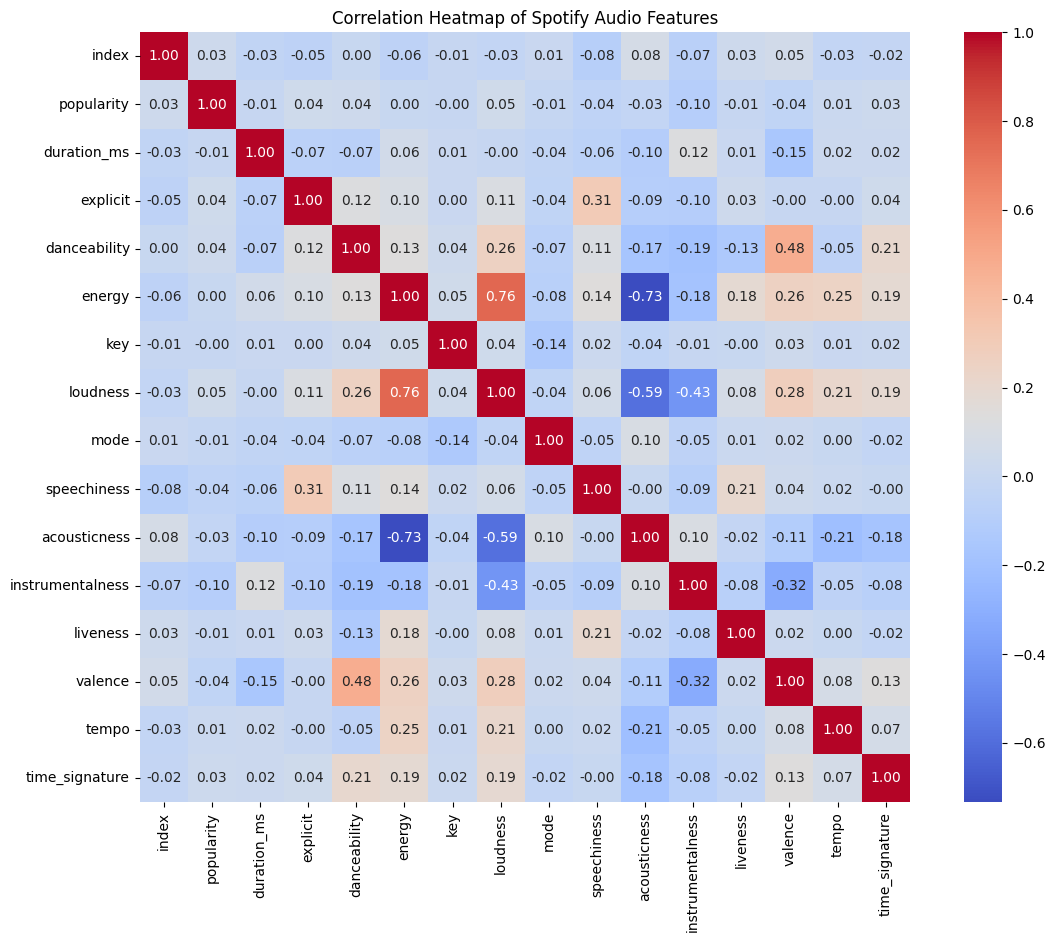

In [16]:
df_num = data.select_dtypes(include=['int64', 'float64', 'bool'])

plt.figure(figsize=(14, 10))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Spotify Audio Features")


Text(0.5, 1.0, 'Top Features Correlated with Popularity')

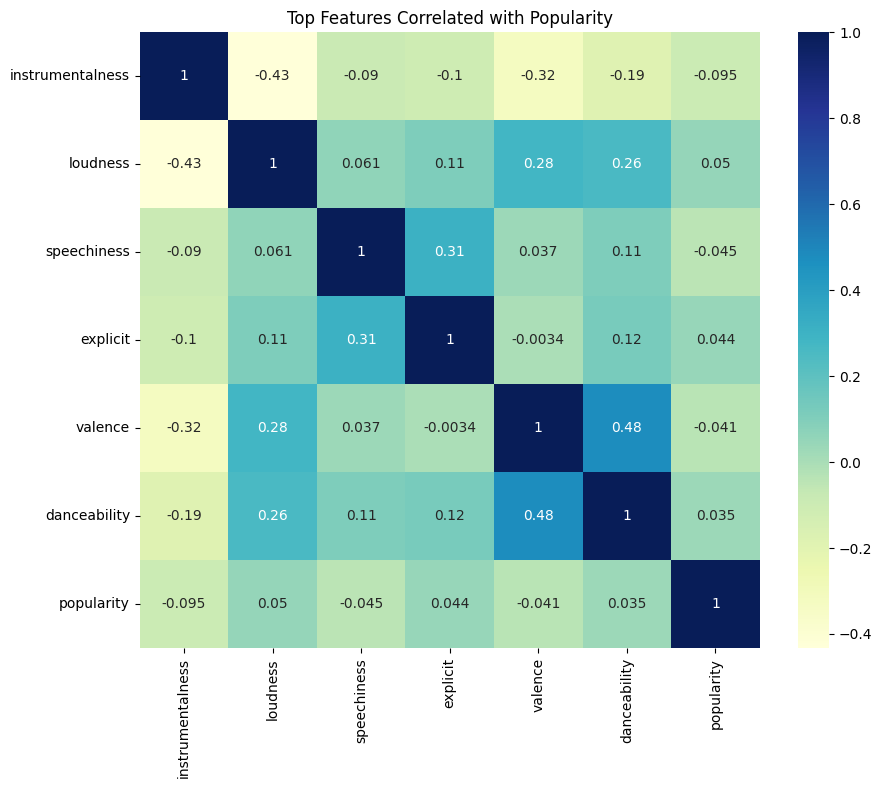

In [17]:
top_corr = df_num.corr()['popularity'].abs().sort_values(ascending=False)[1:7]  # skip 'popularity' itself
top_features = top_corr.index.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(data[top_features + ['popularity']].corr(), annot=True, cmap='YlGnBu')
plt.title("Top Features Correlated with Popularity")


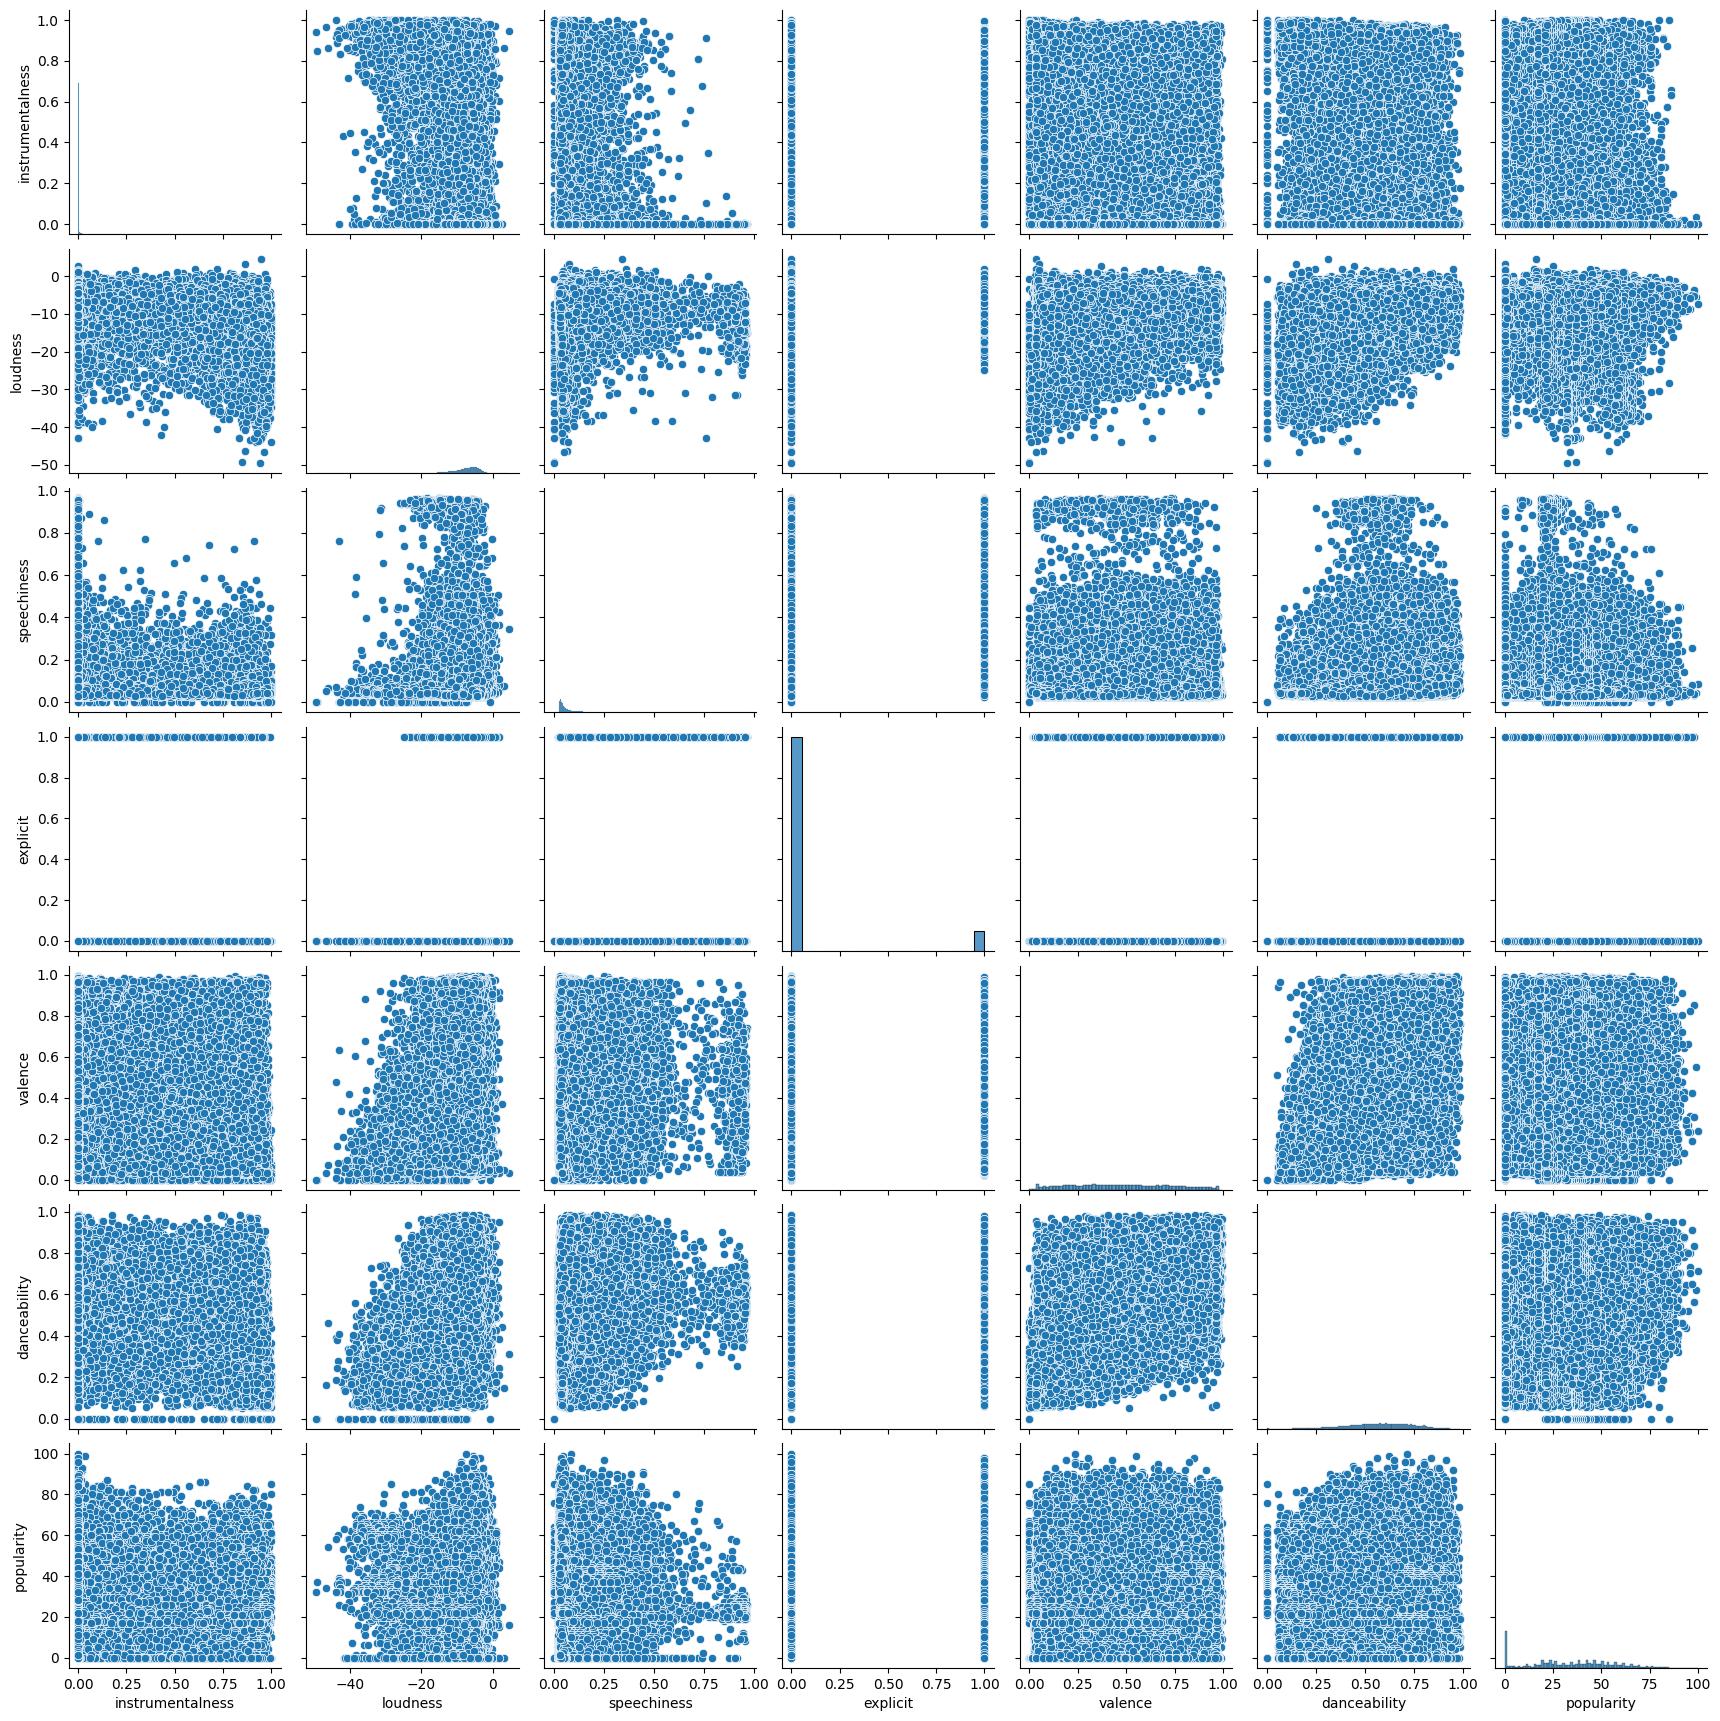

In [18]:
sns.pairplot(data[top_features + ['popularity']])


Text(0.5, 1.0, 'Popularity Distribution by Top 10 Genres')

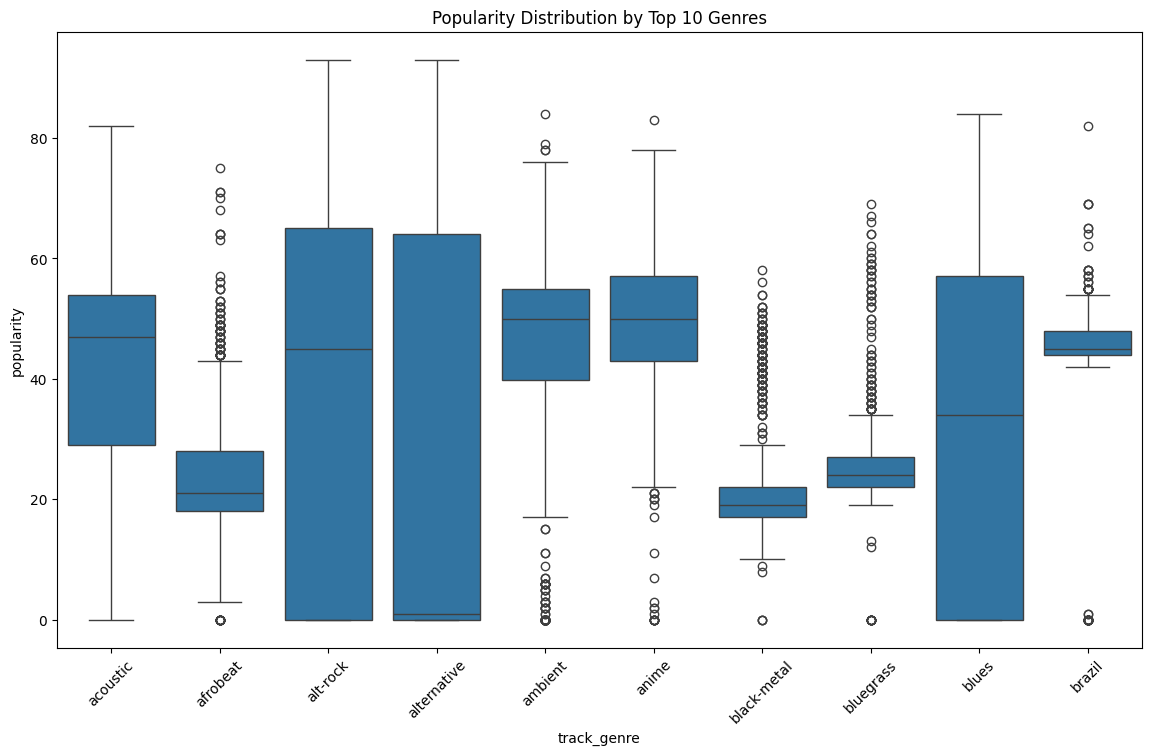

In [20]:
top_genres = data['track_genre'].value_counts().head(10).index
filtered_df = data[data['track_genre'].isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', data=filtered_df)
plt.xticks(rotation=45)
plt.title("Popularity Distribution by Top 10 Genres")


Text(0.5, 1.0, 'Loudness vs. Energy Colored by Genre')

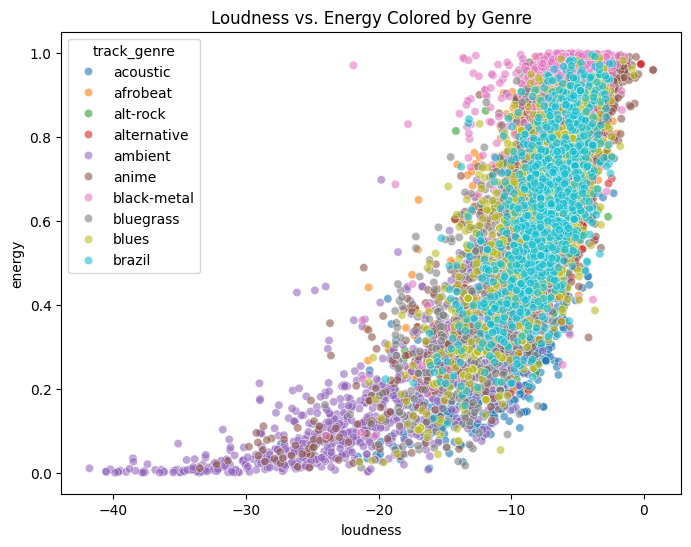

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loudness', y='energy', hue='track_genre', data=filtered_df, alpha=0.6)
plt.title("Loudness vs. Energy Colored by Genre")


Text(0.5, 1.0, 'Danceability vs. Valence Colored by Genre')

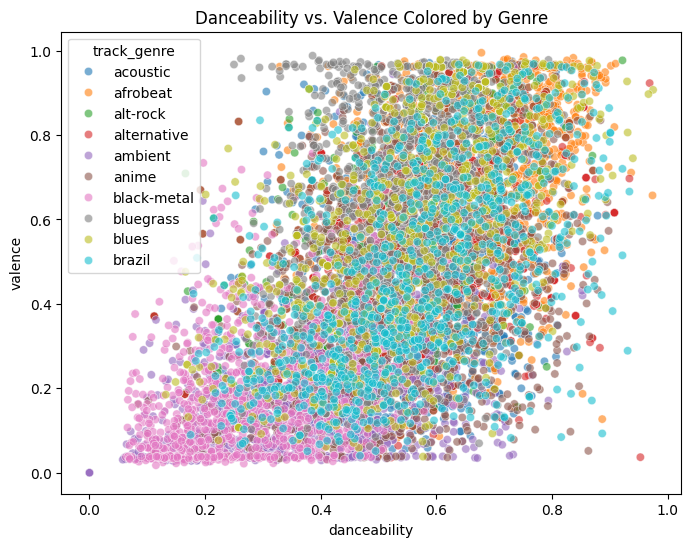

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='valence', hue='track_genre', data=filtered_df, alpha=0.6)
plt.title("Danceability vs. Valence Colored by Genre")


Text(0.5, 1.0, 'Distribution of Track Tempo')

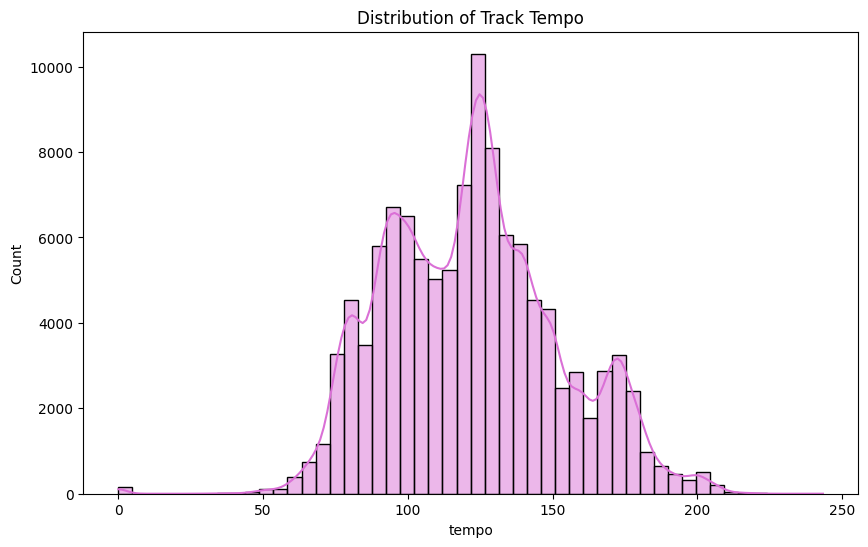

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['tempo'], bins=50, kde=True, color='orchid')
plt.title("Distribution of Track Tempo")


Text(0.5, 1.0, 'Instrumentalness by Genre')

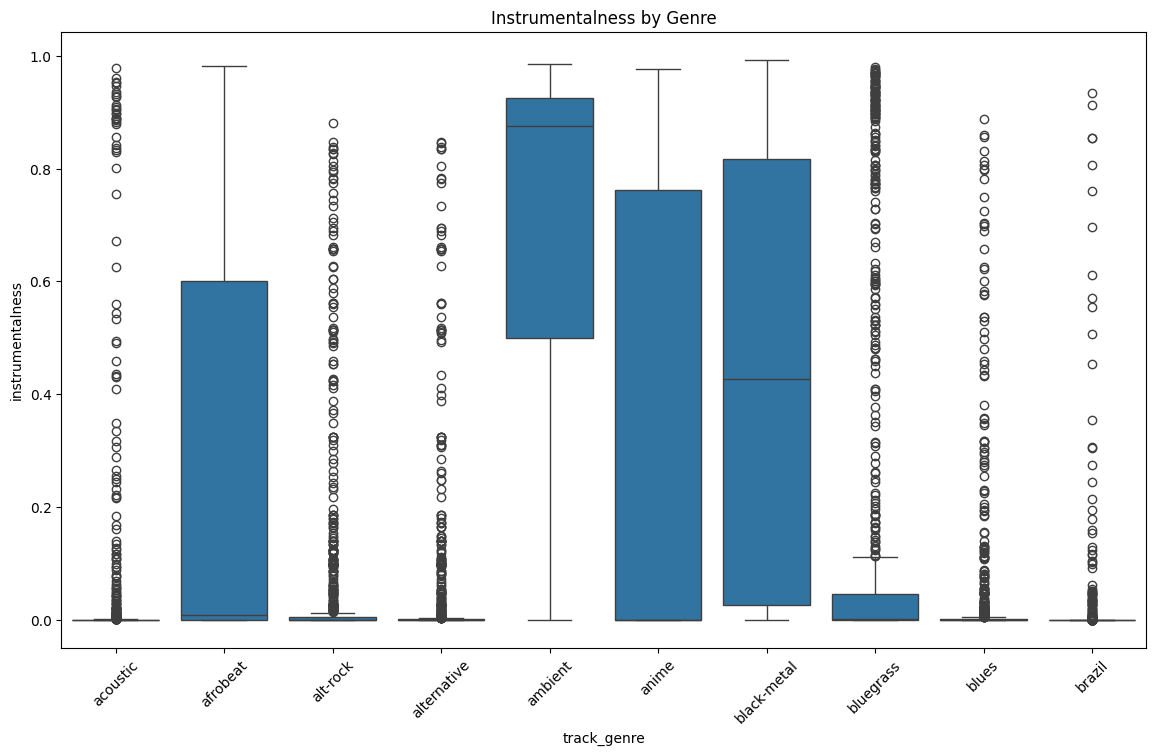

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='instrumentalness', data=filtered_df)
plt.xticks(rotation=45)
plt.title("Instrumentalness by Genre")
